# Example Stitching Notebook

scPortrait uses [Ashlar](https://labsyspharm.github.io/ashlar/) for stitching images. When stitching from `.tif` files, Ashlar reads channel and tile position information from filenames according to a predefined `pattern`. Hence, filenames matter when stitching from `.tif` files.

In [1]:
import os

os.environ["JAVA_HOME"] = "/Users/sophia/mambaforge/envs/scPortrait/lib/jvm"
import matplotlib.pyplot as plt

from scportrait.data._datasets import dataset_stitching_example
from scportrait.tools.stitch import ParallelStitcher, Stitcher

/Users/sophia/mambaforge/envs/scPortrait/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Single-threaded Stitching

### Initializing the `Stitcher` object

In [ ]:
input_dir = dataset_stitching_example()
slidename = "stitching_test"
outdir = os.path.join(input_dir.replace("stitching_example", "example_projects/stitching"), slidename)

row = str(2).zfill(2)  # specify the row of the well you want to stitch, here = 2
well = str(4).zfill(2)  # specifc the well number you wish to stitch, here = 4
zstack_value = str(1).zfill(
    3
)  # specify the zstack you want to stitch. for multiple zstacks please make a loop and iterate through each of them.
timepoint = str(1).zfill(3)  # specify the timepoint you wish to stitch

pattern = f"Timepoint{timepoint}_Row{row}_Well{well}_{{channel}}_zstack{zstack_value}_r{{row:03}}_c{{col:03}}.tif"

# initialize stitcher
stitcher = Stitcher(
    os.path.abspath(input_dir),
    slidename,
    outdir,
    pattern=pattern,
    stitching_channel="Alexa488",
    overlap=0.1,
    max_shift=30,
    filter_sigma=0,
    rescale_range={"Alexa488": (1, 99), "DAPI": (1, 99), "mCherry": (1, 99)},
    overwrite=True,
)

Output directory created at:  /Users/sophia/Documents/GitHub/scPortrait/scportrait_data/example_projects/stitching/stitching_test


### Generating thumbnails

In [4]:
stitcher.generate_thumbnail()

    assembling thumbnail 9/9


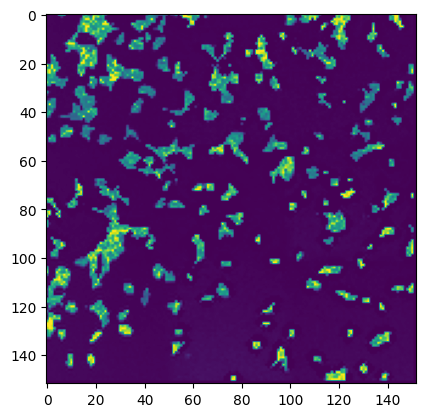

In [5]:
# thumbnail is saved in the stitcher object and can be accessed via stitcher.thumbnail
plt.imshow(stitcher.thumbnail)

In [6]:
# alterantively it can be saved to a tif file
stitcher.write_thumbnail()

In [7]:
stitcher.initialize_reader()

### Generating full-scale stitched image

performing stitching on channel Alexa488 with id number 0
    quantifying alignment error 1000/1000
    aligning edge 12/12


Alignment complete.
assembling mosaic with shape (3, 3040, 3038)
created tempmmap array for assembled mosaic at /Users/sophia/Documents/GitHub/scPortrait/scportrait_data/example_projects/stitching/stitching_test/temp_mmap_s16co0a1/temp_mmap_4464623890994857332.hdf


  0%|          | 0/3 [00:00<?, ?it/s]

        merging tile 9/9

 33%|███▎      | 1/3 [00:00<00:01,  1.01it/s]


        merging tile 9/9

 67%|██████▋   | 2/3 [00:02<00:01,  1.01s/it]


        merging tile 9/9

100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

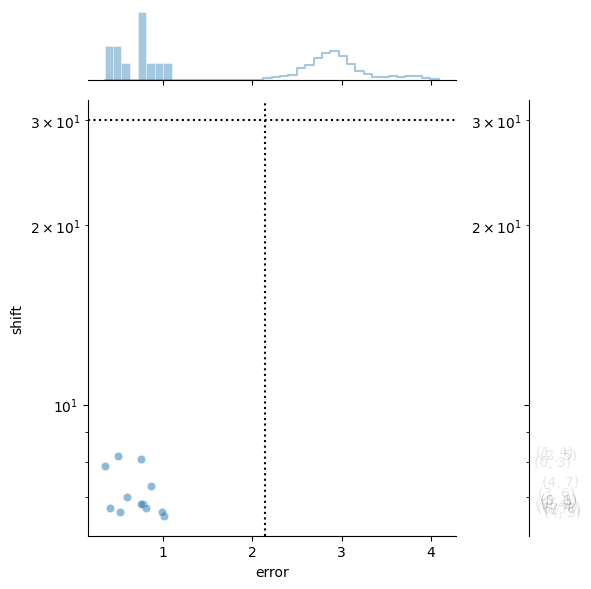

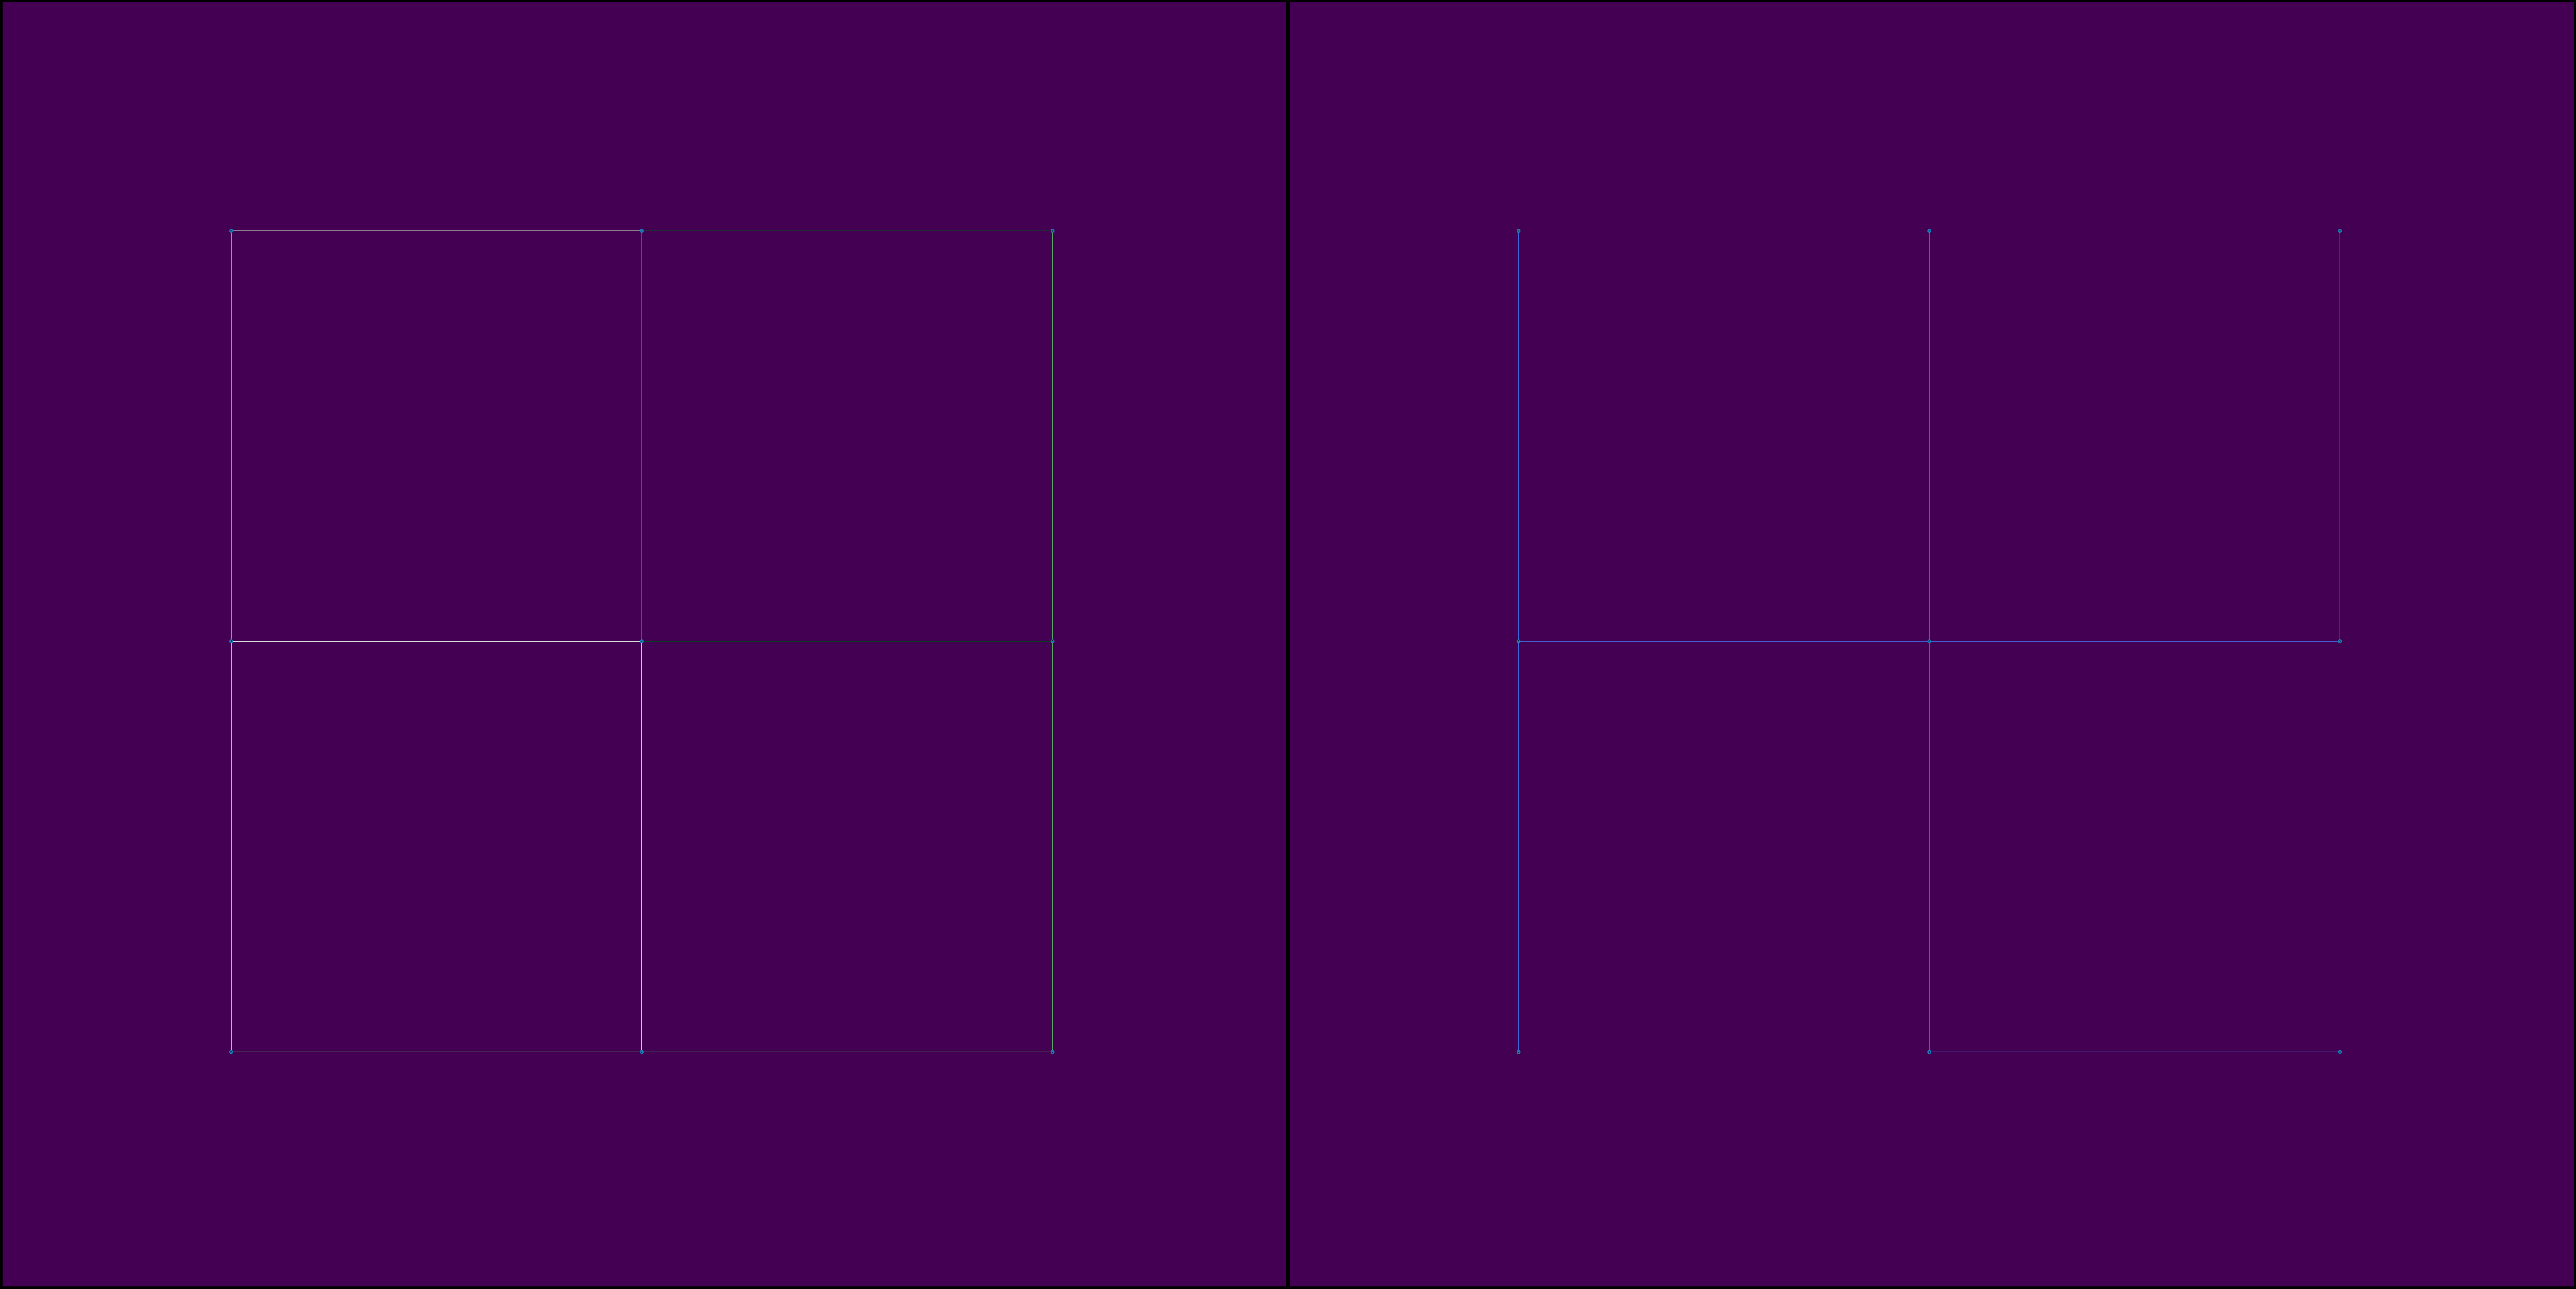

In [8]:
stitcher.stitch()

In [9]:
# the stitched image is saved in the stitcher object and can be accessed via stitcher.assembled_mosaic
stitcher.assembled_mosaic

dask.array<from-value, shape=(3, 3040, 3038), dtype=uint16, chunksize=(3, 3040, 3038), chunktype=numpy.ndarray>

In [10]:
# the stitched image can then be written to a variety of output formats

stitcher.write_tif(export_xml=True)
stitcher.write_ome_zarr()

(-0.5, 3037.5, 3039.5, -0.5)

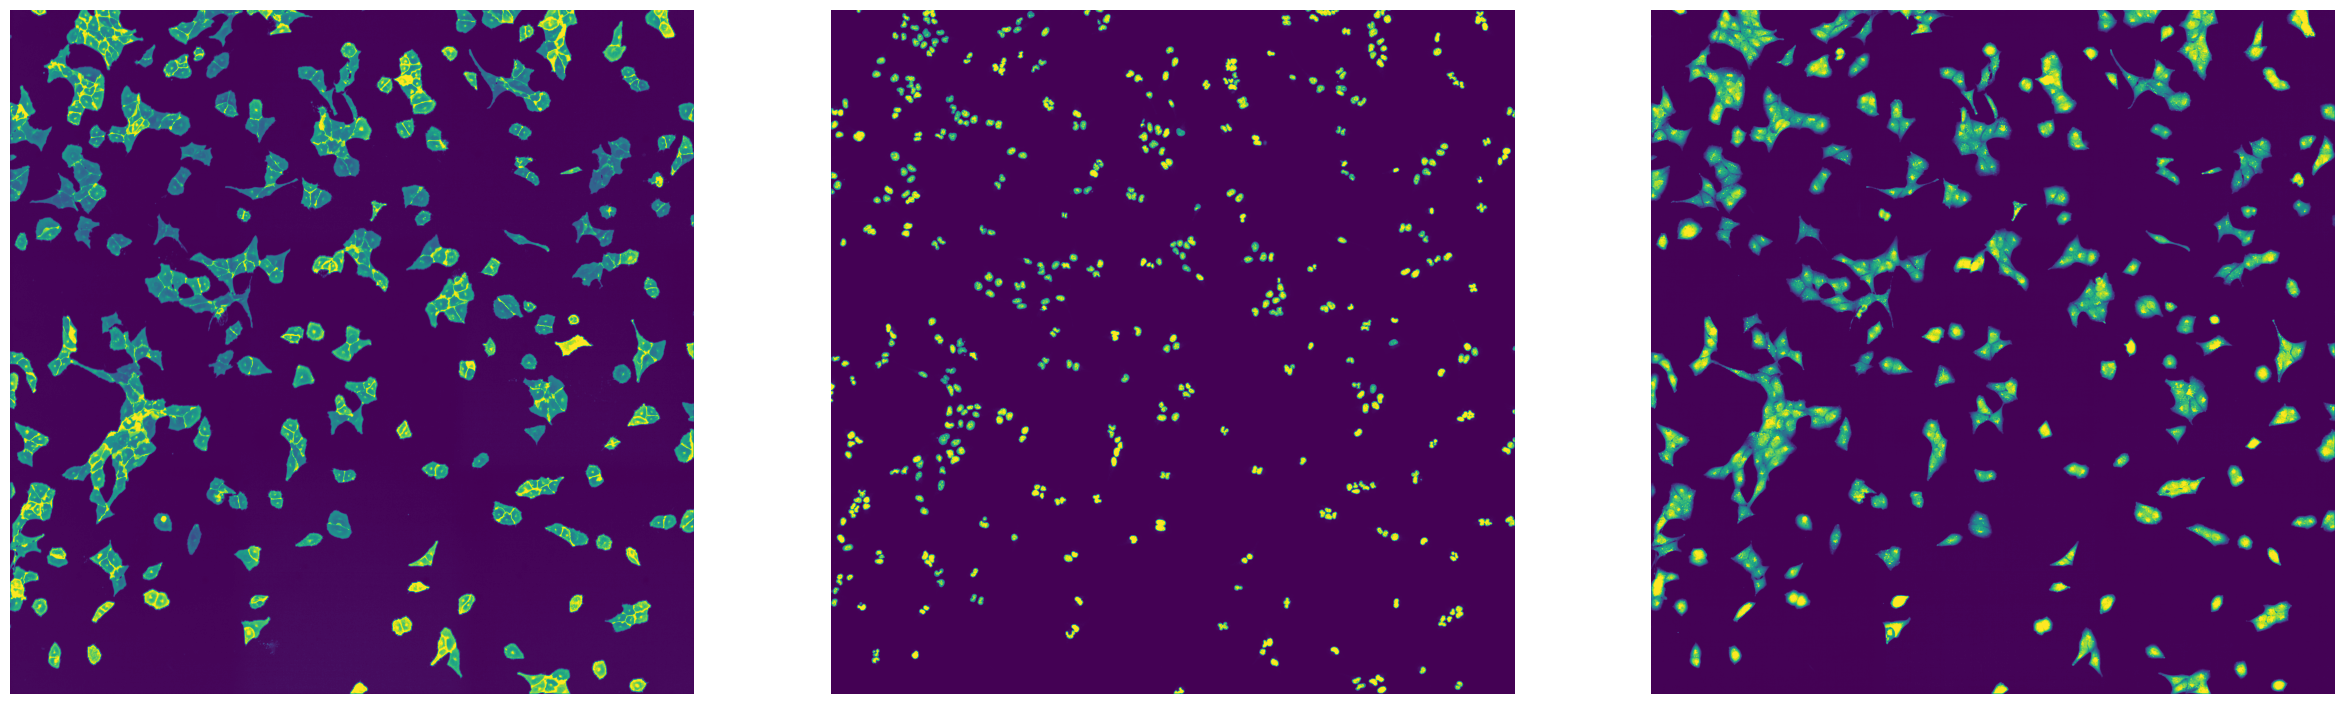

In [11]:
import matplotlib.pyplot as plt
from tifffile import imread

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].imshow(imread(f"{outdir}/stitching_test_Alexa488.tif"))
axs[0].axis("off")

axs[1].imshow(imread(f"{outdir}/stitching_test_DAPI.tif"))
axs[1].axis("off")

axs[2].imshow(imread(f"{outdir}/stitching_test_mCherry.tif"))
axs[2].axis("off")

In [12]:
del stitcher

## Multi-threaded Stitching

Using the `ParallelStitcher` class stitching can be speed up by using multiple threads. The code to perform stitching remains the same, but `ParallelStitcher` takes an additional argument `threads`, specifying the number of parallel threads to use.

### Initializing the `ParallelStitcher` object

In [ ]:
input_dir = dataset_stitching_example()
slidename = "stitching_test_parallel"
outdir_parallel = os.path.join(input_dir.replace("stitching_example", "example_projects/stitching"), slidename)


row = str(2).zfill(2)  # specify the row of the well you want to stitch, here = 2
well = str(4).zfill(2)  # specifc the well number you wish to stitch, here = 4
zstack_value = str(1).zfill(
    3
)  # specify the zstack you want to stitch. for multiple zstacks please make a loop and iterate through each of them.
timepoint = str(1).zfill(3)  # specify the timepoint you wish to stitch

pattern = f"Timepoint{timepoint}_Row{row}_Well{well}_{{channel}}_zstack{zstack_value}_r{{row:03}}_c{{col:03}}.tif"

# initialize stitcher
stitcher = ParallelStitcher(
    input_dir,
    slidename,
    outdir_parallel,
    pattern=pattern,
    stitching_channel="Alexa488",
    overlap=0.1,
    max_shift=30,
    filter_sigma=0,
    rescale_range={"Alexa488": (1, 99), "DAPI": (1, 99), "mCherry": (1, 99)},
    overwrite=True,
    threads=12,
)

Output directory created at:  /Users/sophia/Documents/GitHub/scPortrait/scportrait_data/example_projects/stitching/stitching_test_parallel


### Generating thumbnails

In [15]:
stitcher.generate_thumbnail()

    assembling thumbnail 9/9


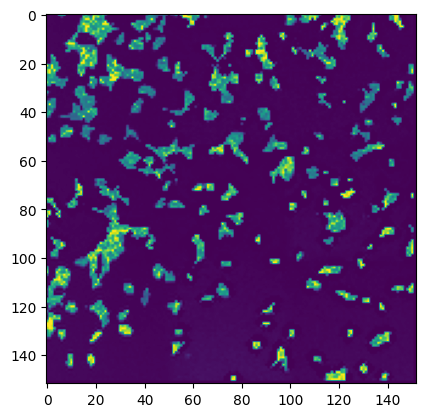

In [16]:
# thumbnail is saved in the stitcher object and can be accessed via stitcher.thumbnail
plt.imshow(stitcher.thumbnail)

In [17]:
# alterantively it can be saved to a tif file
stitcher.write_thumbnail()

### Generating full-scale stitched image

performing stitching on channel Alexa488 with id number 0
graph-tool not available, using networkx as default. 
 For stitching large datasets, graph-tool is recommended as it provides better performance.
                  aligning edge: 100%|██████████| 12/12 [00:00<00:00, 21.84it/s]


Alignment complete.
assembling mosaic with shape (3, 3040, 3038)
created tempmmap array for assembled mosaic at /Users/sophia/Documents/GitHub/scPortrait/scportrait_data/example_projects/stitching/stitching_test_parallel/temp_mmap_hiwtpfwn/temp_mmap_2484028152428819120.hdf
assembling channels with 3 workers
assembling mosaic:   0%|          | 0/3 [00:00<?, ?it/s]


























assembling mosaic:  33%|███▎      | 1/3 [00:01<00:02,  1.11s/it]


assembling mosaic: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]


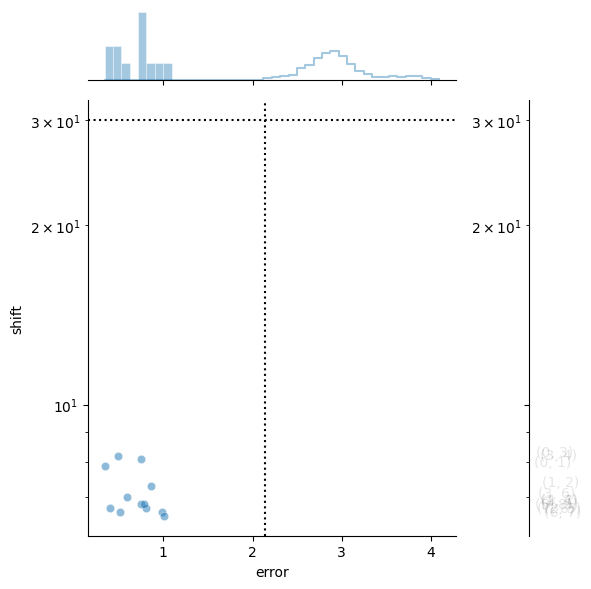

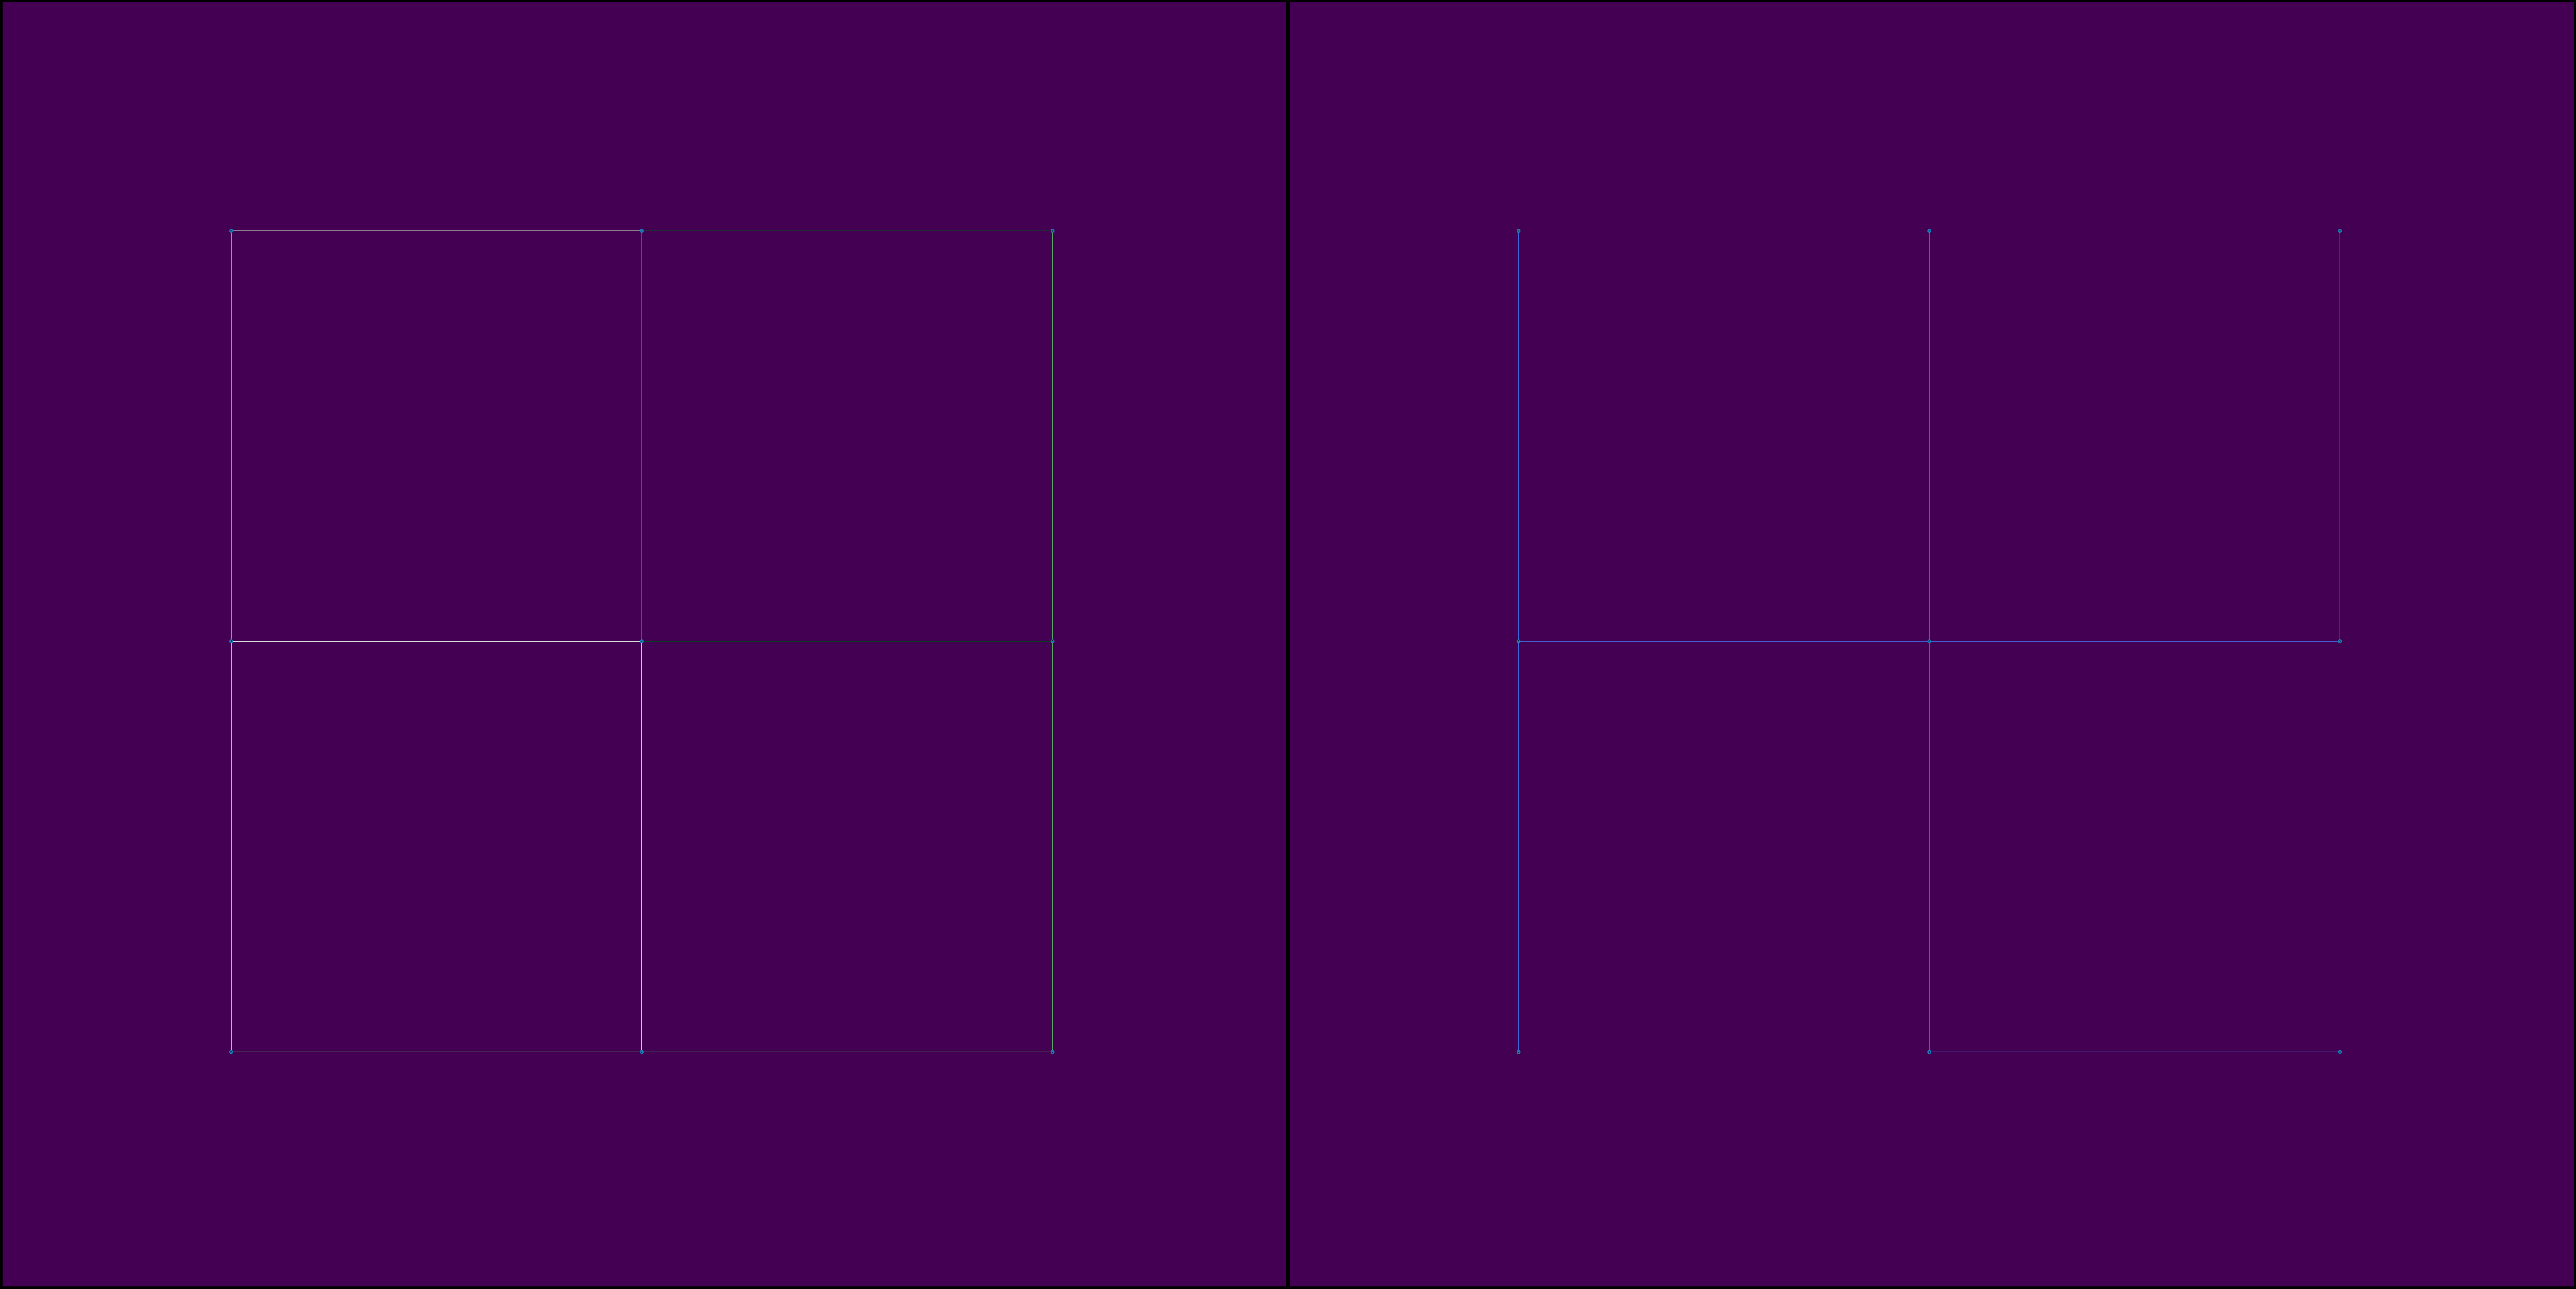

In [18]:
stitcher.stitch()

In [19]:
# the stitched image is saved in the stitcher object and can be accessed via stitcher.assembled_mosaic
stitcher.assembled_mosaic

dask.array<from-value, shape=(3, 3040, 3038), dtype=uint16, chunksize=(3, 3040, 3038), chunktype=numpy.ndarray>

In [20]:
# the stitched image can then be written to a variety of output formats

stitcher.write_tif(export_xml=True)

# alternatively the stitched images can also be written out to tifs in a multi-threaded format
# speedups here are limited by write speed to disk, the number of threads is limited by the number of channels available
stitcher.write_tif_parallel(export_xml=True)

stitcher.write_ome_zarr()

writing tif files: 100%|██████████| 3/3 [00:00<00:00, 204.13it/s]


## Visualize Stitching Output

(-0.5, 3037.5, 3039.5, -0.5)

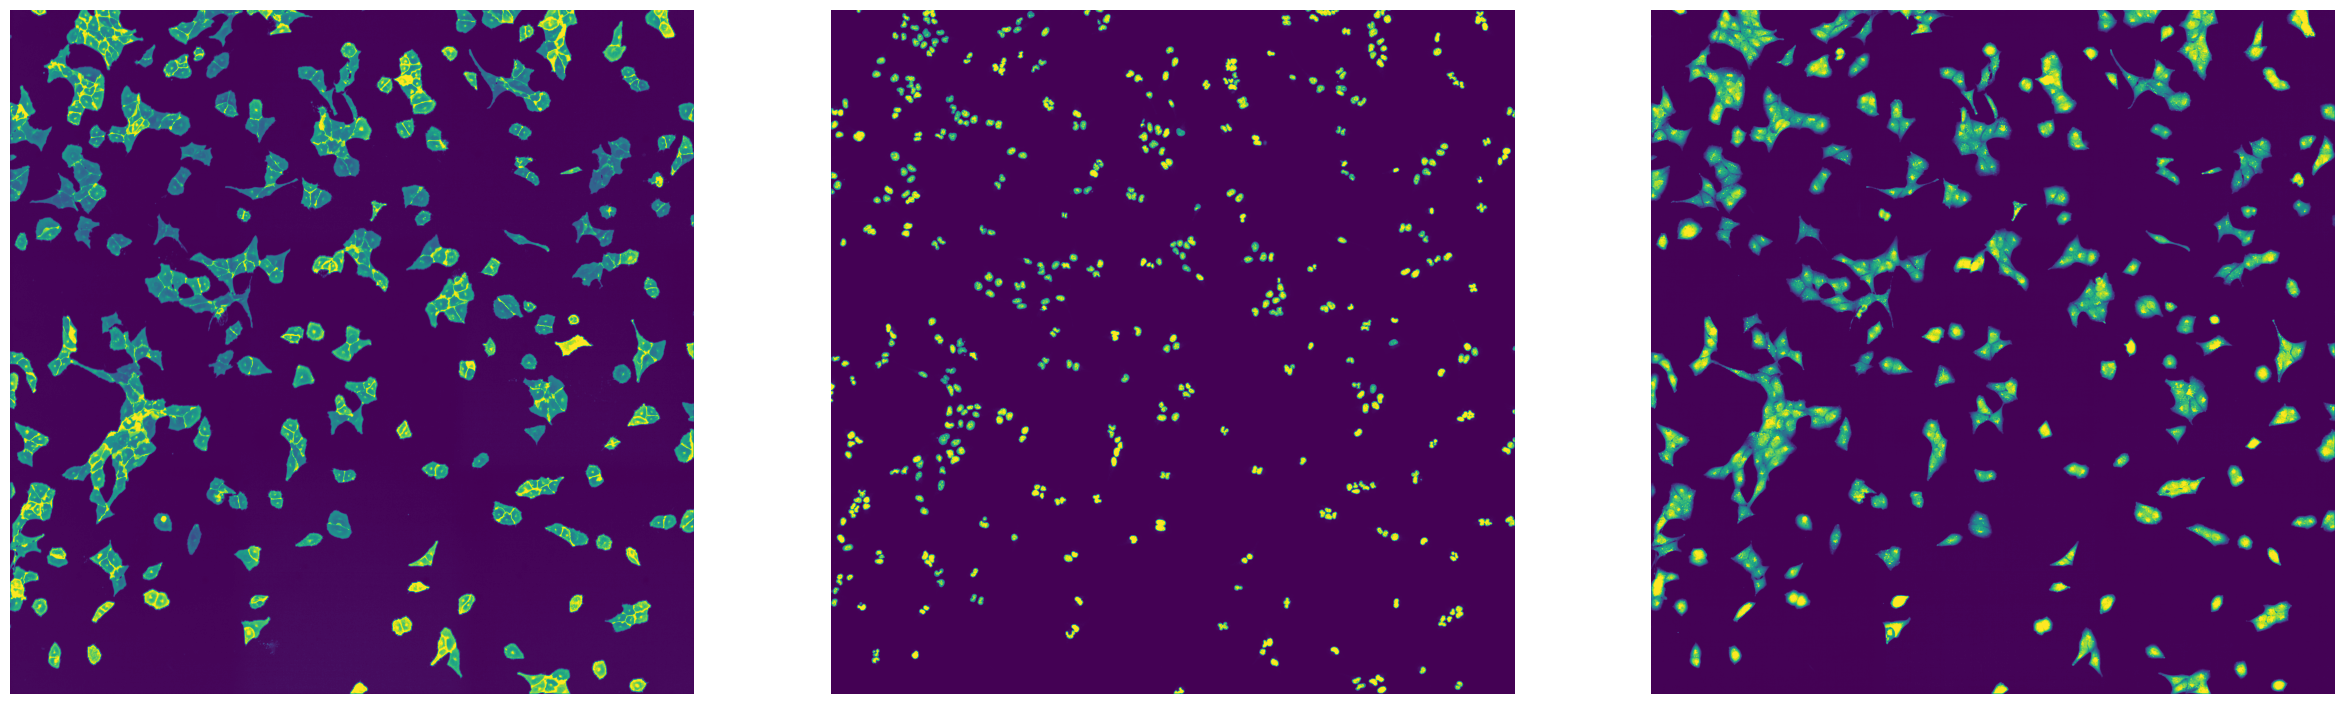

In [21]:
import matplotlib.pyplot as plt
from tifffile import imread

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].imshow(imread(f"{outdir_parallel}/stitching_test_parallel_Alexa488.tif"))
axs[0].axis("off")

axs[1].imshow(imread(f"{outdir_parallel}/stitching_test_parallel_DAPI.tif"))
axs[1].axis("off")

axs[2].imshow(imread(f"{outdir_parallel}/stitching_test_parallel_mCherry.tif"))
axs[2].axis("off")

In [22]:
# compare parallel and non-parallel stitching

imread(f"{outdir_parallel}/stitching_test_parallel_Alexa488.tif") == imread(f"{outdir}/stitching_test_Alexa488.tif")

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [23]:
del stitcher